<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_NewtonsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Newton's Method

This is the **master** version. See the **student** branch for a open ended demo.

Note: this [interactive Newton method demo](https://www.geogebra.org/m/DGFGBJyU) on geogebra is highly recommended, as it lets you see exactly how Newton's method works

In the [Ch2_IntroToBisection.ipynb](https://github.com/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_IntroToBisection.ipynb) demo, we looked at [Lambert's W function](https://en.wikipedia.org/wiki/Lambert_W_function). Let's use this example again for root finding, but this time via Newton's method

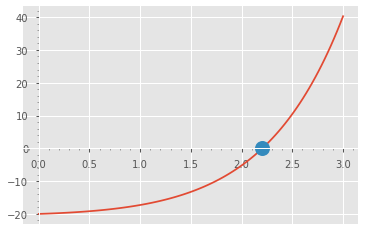

In [ ]:
import numpy as np

x = 20
f = lambda y : y*np.exp(y) - x


# Let's also get a "true" answer, or at least a fairly good one
import scipy.special.lambertw as W

trueAnswer = np.real( W(20) )
relError = lambda guess : abs( guess - trueAnswer )/abs(trueAnswer)
correctDigits = lambda guess : -np.log10( relError(guess) + 1e-17)

# Plotting

yGrid = np.linspace(0,3,100)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('seaborn-notebook')

fig, ax = plt.subplots()
plt.plot(yGrid,f(yGrid))
plt.plot( trueAnswer,f(trueAnswer),'o',markersize=15)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()

## Task: implement Newton's Method

1. Start with a simple implementation that runs the iterations, maybe printing out the value of x and f(x) at every iteration.  Run the method for a fixed number of iterations (like 20)
2. You can make fancier implementations that **save** a list of x and f(x) in case you want to display or plot them later
3. You can implement any of the stopping criteria discussed in our book, e.g.,
  - $|x_n - x_{n-1}| \le \epsilon$
  - $\frac{|x_n - x_{n-1}|}{\max\{|x_,10^{-15}\}} \le \epsilon$
  - $|f(x_n)| \le \epsilon$ 
4. Try different starting conditions, like
  - $x_0 = 2$
  - $x_0 = 200$
  - $x_0 = -2$
  
Do all starting conditions lead to convergence? Are they all quadratic convergence right away?

In [ ]:
# Basic code
def Newton_simple(f,fprime,x0,maxIter = 100):
  
  x   = np.asarray(x0).copy() # in case it is np.array, we want to do a copy
  # (np.assarray will do nothing if input is already an np.array, and if it isn't,
  #  it'll try to convert it to one, e.g., convert a List to np.array)
  
  for n in range(1,maxIter):
    x  = x - f(x)/fprime(x)
  return x

# Fancier code (with saved output and nicer stopping conditions)
def Newton(f,fprime,x0,maxIter = 100, fTol = 1e-8, relTol = 1e-8,Verbose=False):
  history_x  = np.zeros(maxIter)
  history_fx = np.zeros(maxIter)
  x   = np.asarray(x0,dtype=np.double).copy()
  fx  = f(x)
  history_x[0]  = x
  history_fx[0] = fx
  for n in range(1,maxIter):
    try:
      x -= fx / fprime(x)
    except ZeroDivisionError:
      return x, history_x, history_fx
    #print(x,fprime(x)) # for debugging
    if Verbose:
      print("Iteration {:4d}, x is {:+14.8e}, f(x) is {:+14.8e},  f'(x) is {:+14.8e}".format(n,x,fx,fprime(x)))
    fx = f(x)
    history_x[n] = x
    history_fx[n] = fx
    if np.abs(fx) <= fTol or np.abs(x-history_x[n-1])/max(1e-15,x) <= relTol:
      print('Reached stopping criteria at iteration',n)
      history_x  = history_x[:n]
      history_fx = history_fx[:n]
      break
  return x, history_x, history_fx

Reached stopping criteria at iteration 26


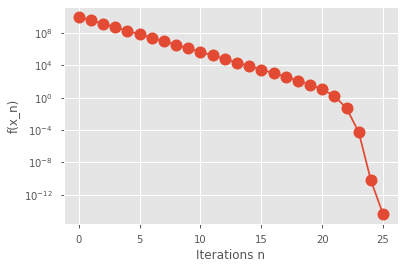

In [ ]:
# Now, run Newton's method on the function f
fprime = lambda y : np.exp(y) + y*np.exp(y)

x0  = 20
p, history_x, history_fx = Newton(f,fprime,x0,maxIter=50,fTol = 1e-15,relTol = 1e-15)
p
plt.plot(abs(history_fx),'o-',MarkerSize=12);
plt.yscale("log")
plt.xlabel("Iterations n")
plt.ylabel("f(x_n)");

Discussion of results:
- for $x_0=2$ we get very rapid convergence right away
- for $x_0=20$, we're not close enough for the theorems to apply. We still convergen, just at a linear rate, not quadratic. Then, once we get close enough, the theorems do apply, and we get very fast quadratic convergence.  If we keep going for further iterations, we don't get any lower error because we've reached the limit of floating point precisino
- for $x_0 = -2$ we diverge to $-\infty$

## Task: implement the Secant Method
You'll notice one important detail: we need to specify **two** initial points, $x_0$ and $x_1$

In [ ]:
def Secant(f,x0,x1,maxIter = 100, fTol = 1e-8, relTol = 1e-8):
  history_x  = np.zeros(maxIter)
  history_fx = np.zeros(maxIter)

  
  x_old= np.asarray(x0).copy() # .copy() probably not necessary
  x    = np.asarray(x1).copy()
  fx_old = f(x_old)
  fx     = f(x)
  history_x[0]  = x
  history_fx[0] = fx

  for n in range(1,maxIter):
    xNew  = x - fx*(x-x_old)/(fx-fx_old)
    x_old = x
    fx_old= fx
    x     = xNew

    fx = f(x)
    # print(x,x_old,fx,fx_old) # debugging
    history_x[n] = x
    history_fx[n] = fx
    if np.abs(fx) <= fTol or np.abs(x-history_x[n-1])/max(1e-15,x) <= relTol:
      print('Reached stopping criteria at iteration',n)
      history_x  = history_x[:n]
      history_fx = history_fx[:n]
      break
  return x, history_x, history_fx

Reached stopping criteria at iteration 7
Reached stopping criteria at iteration 5


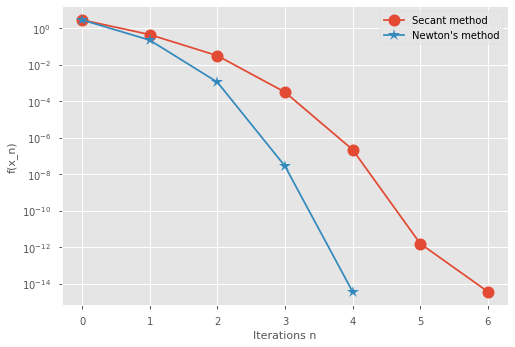

In [ ]:
# Now, run the Secant method on the function f
x0  = 2
x1  = x0 + .1
p, history_x, history_fx = Secant(f,x0,x1,maxIter=50,fTol = 1e-15,relTol = 1e-15)
p, Newton_history_x, Newton_history_fx = Newton(f,fprime,x1,maxIter=50,fTol = 1e-15,relTol = 1e-15)

plt.plot(abs(history_fx),'o-',MarkerSize=12,label="Secant method");
plt.plot(abs(Newton_history_fx),'*-',MarkerSize=12,label="Newton's method");
plt.yscale("log")
plt.xlabel("Iterations n");
plt.ylabel("f(x_n)");
plt.legend();

### Task: compare Newton's method, the Secant method, and bisection method

## Task: "break" Newton's method

Find a function $f(x)$ that satisfies all of the following properties:
* $f$ is *strictly monotonically increasing*
* $f$ has a *simple root* at $x=0$
* $f'(x)$ exists for all real $x$
* Newton's method diverges when started with an initial guess $x_0 = 1$.

#### Definition
* A function $f$ is *strictly monotonically increasing* if $f(a) < f(b)$ for all $a < b$.  If $f$ is differentiable, this implies $f'(x) > 0$ for all $x$.

### One answer: $f(x)=\arctan(c\cdot x)$
There are lots of possiblities.  It helps to draw a sketch of a monotonically increasing function with a root at $x=0$, and then start drawing tangent lines to see what can go wrong.  One choice is $f(x)=\arctan(c\cdot x)$ for a large enough constant $c$ (which has the effect of using $\arctan(x)$ but for $x_0 = c$); in fact, Newton's method is "affine invariant" which means scaling the inside by $x \mapsto c\cdot x + b$ will not affect the iterations, though it *does* affect the starting guess.

In [ ]:
c      = 5
f      = lambda x : np.arctan(c*x)
fprime = lambda x : c/(1+(c*x)**2)

x0    = .1
print("Running Newton's method starting at x0 = {}\n".format(x0))
p, Newton_history_x, Newton_history_fx = Newton(f,fprime,x0,maxIter=20,fTol = 1e-15,relTol = 1e-15,Verbose=True)

# Now, try it again for a starting point farther away
x0    = 1
print("\nRunning Newton's method starting at x0 = {}\n".format(x0))
p, Newton_history_x, Newton_history_fx = Newton(f,fprime,x0,maxIter=12,fTol = 1e-15,relTol = 1e-15,Verbose=True)

Running Newton's method starting at x0 = 0.1

Iteration    1, x is -1.59119023e-02, f(x) is +4.63647609e-01,  f'(x) is +4.96855049e+00
Iteration    2, x is +6.70604408e-05, f(x) is -7.93922829e-02,  f'(x) is +4.99999944e+00
Iteration    3, x is -5.02629473e-12, f(x) is +3.35302191e-04,  f'(x) is +5.00000000e+00
Iteration    4, x is +0.00000000e+00, f(x) is -2.51314736e-11,  f'(x) is +5.00000000e+00
Reached stopping criteria at iteration 4

Running Newton's method starting at x0 = 1

Iteration    1, x is -6.14168399e+00, f(x) is +1.37340077e+00,  f'(x) is +5.29657058e-03
Iteration    2, x is +2.84280854e+02, f(x) is -1.53824347e+00,  f'(x) is +2.47476838e-06
Iteration    3, x is -6.34156022e+05, f(x) is +1.57009280e+00,  f'(x) is +4.97322095e-13
Iteration    4, x is +3.15850776e+12, f(x) is -1.57079601e+00,  f'(x) is +2.00477713e-26
Iteration    5, x is -7.83526659e+25, f(x) is +1.57079633e+00,  f'(x) is +3.25778516e-53
Iteration    6, x is +4.82166948e+52, f(x) is -1.57079633e+00,  f'(

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract


As you can see in the above output, for $x_0 = 0.1$, it works just fine and converges. For $x_0 = 1$, it diverges, oscillating between large positive and large negative values.